In [1]:
!pip install tensorflow

In [10]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [13]:
print(train_data,train_data.shape)

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 

In [14]:
train_labels[0]

1

In [15]:
len(train_labels)

25000

In [16]:
test_labels[0]

0

In [17]:
max([max(sequence_647) for sequence_647 in test_data])

9999

In [19]:
word_index_647 = imdb.get_word_index()
reverse_word_index_647 = dict(
    [(value, key) for (key, value) in word_index_647.items()])
decoded_review = " ".join(
    [reverse_word_index_647.get(i - 3, "?") for i in train_data[0]])

In [20]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

In [22]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [23]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [24]:
x_test[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [25]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [26]:
from tensorflow import keras
from tensorflow.keras import layers

model647 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [27]:
model647.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [28]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [29]:
## model planned to train with 20 epoch with batch size of 256
history = model647.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 44ms/step - loss: 0.5292 - accuracy: 0.7707 - val_loss: 0.4022 - val_accuracy: 0.8534
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3204 - accuracy: 0.8955 - val_loss: 0.3155 - val_accuracy: 0.8832
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2418 - accuracy: 0.9205 - val_loss: 0.2892 - val_accuracy: 0.8862
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1971 - accuracy: 0.9340 - val_loss: 0.3087 - val_accuracy: 0.8769
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1654 - accuracy: 0.9459 - val_loss: 0.2927 - val_accuracy: 0.8824
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1392 - accuracy: 0.9564 - val_loss: 0.2857 - val_accuracy: 0.8877
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1237 - accuracy: 0.9614 - val_loss: 0.2953 - val_accuracy: 0.8859
Epoch 8/20
30

In [30]:
history_dict647 = history.history
history_dict647.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

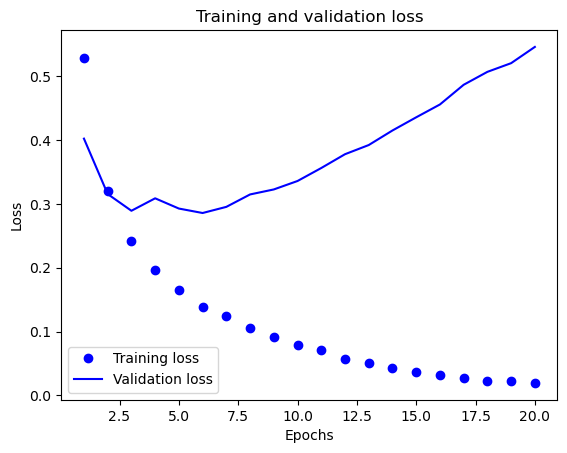

In [31]:
#Plotting the training loss vs validation loss
import matplotlib.pyplot as plot647
history_dict647 = history.history
loss_values = history_dict647["loss"]
val_loss_values = history_dict647["val_loss"]
epochs = range(1, len(loss_values) + 1)
plot647.plot(epochs, loss_values, "bo", label="Training loss")
plot647.plot(epochs, val_loss_values, "b", label="Validation loss")
plot647.title("Training and validation loss")
plot647.xlabel("Epochs")
plot647.ylabel("Loss")
plot647.legend()
plot647.show()

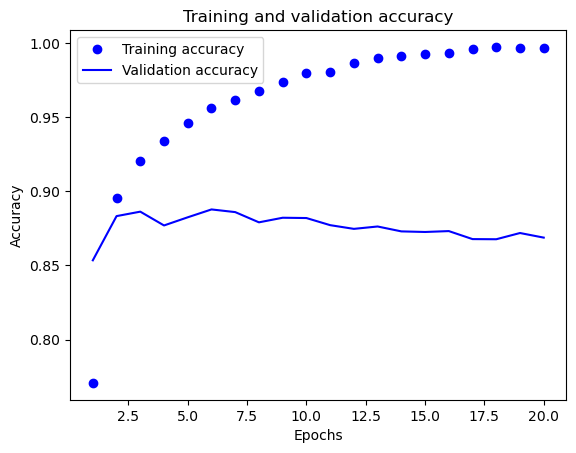

In [32]:
#Plotting training accuracy vs validatition accuracy
plot647.clf()
acc = history_dict647["accuracy"]
val_acc = history_dict647["val_accuracy"]
plot647.plot(epochs, acc, "bo", label="Training accuracy")
plot647.plot(epochs, val_acc, "b", label="Validation accuracy")
plot647.title("Training and validation accuracy")
plot647.xlabel("Epochs")
plot647.ylabel("Accuracy")
plot647.legend()
plot647.show()

In [33]:
model647 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model647.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model647.fit(x_train, y_train, epochs=4, batch_size=512)
results = model647.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 10ms/step - loss: 0.4788 - accuracy: 0.8020
Epoch 2/4
49/49 [==============================] - 0s 10ms/step - loss: 0.2770 - accuracy: 0.9070
Epoch 3/4
49/49 [==============================] - 0s 10ms/step - loss: 0.2155 - accuracy: 0.9226
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.3063 - accuracy: 0.8765


In [34]:
results

[0.30630290508270264, 0.876479983329773]

In [35]:
model647.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.2704615 ],
       [0.99829805],
       [0.9132757 ],
       ...,
       [0.17560005],
       [0.13606979],
       [0.69128627]], dtype=float32)

In [36]:
model_647_layer = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_647_layer.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

x_val647 = x_train[:10000]
partial_x_train = x_train[10000:]

y_val647 = y_train[:10000]
partial_y_train = y_train[10000:]


history_layer647 = model_647_layer.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val647, y_val647))

Epoch 1/20
30/30 [==============================] - 2s 55ms/step - loss: 0.5147 - accuracy: 0.7965 - val_loss: 0.4125 - val_accuracy: 0.8574
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3410 - accuracy: 0.8939 - val_loss: 0.3348 - val_accuracy: 0.8787
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2717 - accuracy: 0.9121 - val_loss: 0.3029 - val_accuracy: 0.8852
Epoch 4/20
30/30 [==============================] - 0s 17ms/step - loss: 0.2284 - accuracy: 0.9277 - val_loss: 0.2851 - val_accuracy: 0.8885
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1983 - accuracy: 0.9377 - val_loss: 0.2799 - val_accuracy: 0.8872
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1783 - accuracy: 0.9439 - val_loss: 0.2889 - val_accuracy: 0.8833
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1604 - accuracy: 0.9509 - val_loss: 0.2767 - val_accuracy: 0.8887
Epoch 8/20
30

In [37]:
history_dict647 = history_layer647.history
history_dict647.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

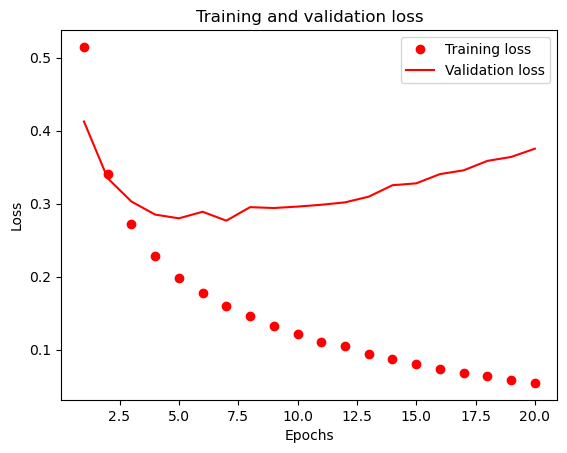

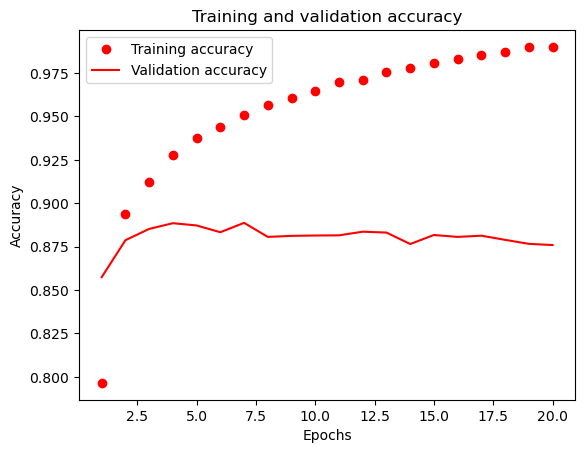

In [38]:
import matplotlib.pyplot as plot647
history_dict647 = history_layer647.history
loss_value647 = history_dict647["loss"]
val_loss_value647 = history_dict647["val_loss"]
epochs647 = range(1, len(loss_value647) + 1)

#Plotting graph of Training and Validation loss
plot647.plot(epochs647, loss_value647, "ro", label="Training loss")
plot647.plot(epochs647, val_loss_value647, "r", label="Validation loss")
plot647.title("Training and validation loss")
plot647.xlabel("Epochs")
plot647.ylabel("Loss")
plot647.legend()
plot647.show()

#Plotting graph of Training and Validation Accuracy
plot647.clf()
accuracy647 = history_dict647["accuracy"]
val_accuracy1 = history_dict647["val_accuracy"]
plot647.plot(epochs647, accuracy647, "ro", label="Training accuracy")
plot647.plot(epochs647, val_accuracy1, "r", label="Validation accuracy")
plot647.title("Training and validation accuracy")
plot647.xlabel("Epochs")
plot647.ylabel("Accuracy")
plot647.legend()
plot647.show()

In [39]:
model_647_layer = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_647_layer.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_647_layer.fit(x_train, y_train, epochs=5, batch_size=512)
result_647_layer = model_647_layer.evaluate(x_test, y_test)

Epoch 1/5
49/49 [==============================] - 1s 10ms/step - loss: 0.4402 - accuracy: 0.8268
Epoch 2/5
49/49 [==============================] - 0s 10ms/step - loss: 0.2789 - accuracy: 0.9026
Epoch 3/5
49/49 [==============================] - 0s 10ms/step - loss: 0.2272 - accuracy: 0.9204
Epoch 4/5
49/49 [==============================] - 0s 10ms/step - loss: 0.1971 - accuracy: 0.9320
Epoch 5/5
782/782 [==============================] - 1s 1ms/step - loss: 0.2877 - accuracy: 0.8829


In [40]:
print(result_647_layer)

[0.2876873314380646, 0.8829200267791748]


In [42]:
model_647_layer.predict(x_test)

782/782 [==============================] - 1s 2ms/step


array([[0.16081636],
       [0.9997293 ],
       [0.75130224],
       ...,
       [0.07036573],
       [0.05571742],
       [0.4480019 ]], dtype=float32)

In [48]:
model_3_layers_647 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_3_layers_647.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
x_val3_647 = x_train[:10000]
partial_x_train_647 = x_train[10000:]

y_val3_647 = y_train[:10000]
partial_y_train_647 = y_train[10000:]

history_3_layers_647 = model_3_layers_647.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val3_647, y_val3_647))

Epoch 1/20
30/30 [==============================] - 2s 36ms/step - loss: 0.5509 - accuracy: 0.7582 - val_loss: 0.4154 - val_accuracy: 0.8443
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3238 - accuracy: 0.8915 - val_loss: 0.3139 - val_accuracy: 0.8781
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2433 - accuracy: 0.9153 - val_loss: 0.2826 - val_accuracy: 0.8883
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1949 - accuracy: 0.9331 - val_loss: 0.2780 - val_accuracy: 0.8873
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1561 - accuracy: 0.9473 - val_loss: 0.2859 - val_accuracy: 0.8862
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1318 - accuracy: 0.9563 - val_loss: 0.3156 - val_accuracy: 0.8774
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1096 - accuracy: 0.9647 - val_loss: 0.3124 - val_accuracy: 0.8817
Epoch 8/20
30

In [49]:
history_dict_3_647 = history_3_layers_647.history
history_dict_3_647.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

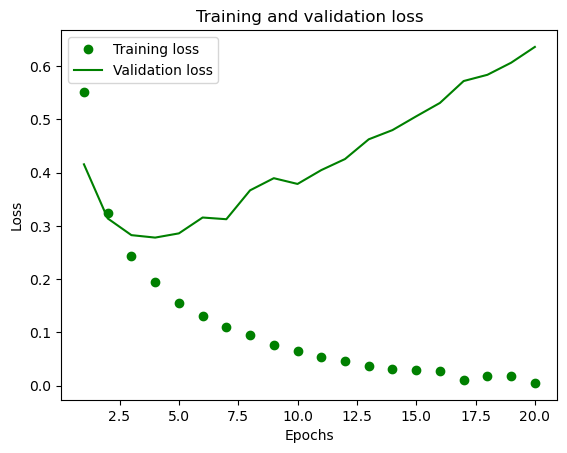

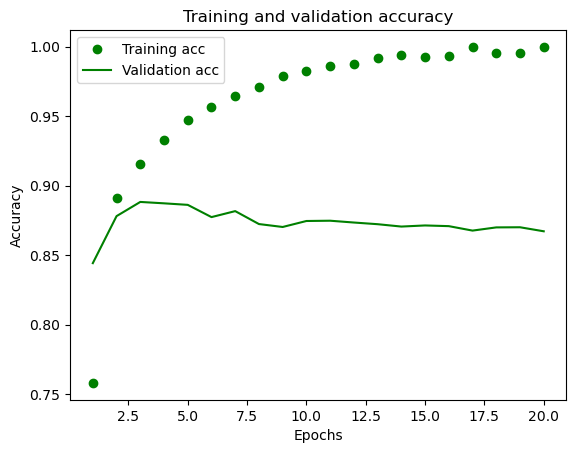

In [50]:
loss_val647 = history_dict_3_647["loss"]
val_loss_val3 = history_dict_3_647["val_loss"]
epochs3 = range(1, len(loss_val647) + 1)
plot647.plot(epochs3, loss_val647, "go", label="Training loss")
plot647.plot(epochs3, val_loss_val3, "g", label="Validation loss")
plot647.title("Training and validation loss")
plot647.xlabel("Epochs")
plot647.ylabel("Loss")
plot647.legend()
plot647.show()


plot647.clf()
accuracy3 = history_dict_3_647["accuracy"]
val_accuracy3 = history_dict_3_647["val_accuracy"]
plot647.plot(epochs3, accuracy3, "go", label="Training acc")
plot647.plot(epochs3, val_accuracy3, "g", label="Validation acc")
plot647.title("Training and validation accuracy")
plot647.xlabel("Epochs")
plot647.ylabel("Accuracy")
plot647.legend()
plot647.show()

In [51]:
model_3_layers_647 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


model_3_layers_647.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_3_layers_647.fit(x_train, y_train, epochs=3, batch_size=512)
results_3_layers = model_3_layers_647.evaluate(x_test, y_test)

Epoch 1/3
49/49 [==============================] - 1s 10ms/step - loss: 0.5124 - accuracy: 0.7814
Epoch 2/3
49/49 [==============================] - 0s 10ms/step - loss: 0.2843 - accuracy: 0.9018
Epoch 3/3
782/782 [==============================] - 2s 2ms/step - loss: 0.3054 - accuracy: 0.8773


In [52]:
print(result_647_layer)

[0.2876873314380646, 0.8829200267791748]


In [53]:
model_647_layer.predict(x_test)

782/782 [==============================] - 1s 2ms/step


array([[0.16081636],
       [0.9997293 ],
       [0.75130224],
       ...,
       [0.07036573],
       [0.05571742],
       [0.4480019 ]], dtype=float32)

In [54]:
model_3_layers_647 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_3_layers_647.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
x_val3_647 = x_train[:10000]
partial_x_train_647 = x_train[10000:]

y_val3_647 = y_train[:10000]
partial_y_train_647 = y_train[10000:]

history_3_layers_647 = model_3_layers_647.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val3_647, y_val3_647))

Epoch 1/20
30/30 [==============================] - 2s 48ms/step - loss: 0.5923 - accuracy: 0.7353 - val_loss: 0.4521 - val_accuracy: 0.8481
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3597 - accuracy: 0.8861 - val_loss: 0.3214 - val_accuracy: 0.8834
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2557 - accuracy: 0.9120 - val_loss: 0.2987 - val_accuracy: 0.8806
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2002 - accuracy: 0.9319 - val_loss: 0.3242 - val_accuracy: 0.8680
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1656 - accuracy: 0.9435 - val_loss: 0.3337 - val_accuracy: 0.8668
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1404 - accuracy: 0.9557 - val_loss: 0.2873 - val_accuracy: 0.8843
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1186 - accuracy: 0.9616 - val_loss: 0.2997 - val_accuracy: 0.8835
Epoch 8/20
30

In [55]:
history_dict_3_647 = history_3_layers_647.history
history_dict_3_647.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

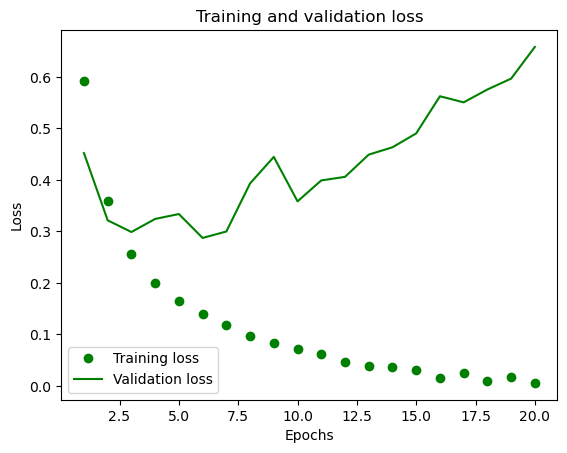

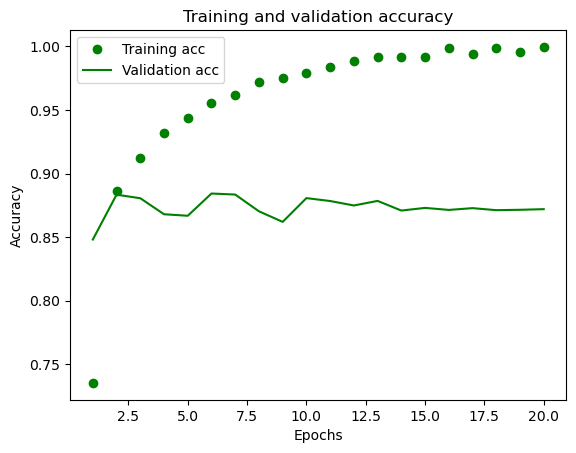

In [56]:
loss_val647 = history_dict_3_647["loss"]
val_loss_val3 = history_dict_3_647["val_loss"]
epochs3 = range(1, len(loss_val647) + 1)
plot647.plot(epochs3, loss_val647, "go", label="Training loss")
plot647.plot(epochs3, val_loss_val3, "g", label="Validation loss")
plot647.title("Training and validation loss")
plot647.xlabel("Epochs")
plot647.ylabel("Loss")
plot647.legend()
plot647.show()


plot647.clf()
accuracy3 = history_dict_3_647["accuracy"]
val_accuracy3 = history_dict_3_647["val_accuracy"]
plot647.plot(epochs3, accuracy3, "go", label="Training acc")
plot647.plot(epochs3, val_accuracy3, "g", label="Validation acc")
plot647.title("Training and validation accuracy")
plot647.xlabel("Epochs")
plot647.ylabel("Accuracy")
plot647.legend()
plot647.show()

In [57]:
model_3_layers_647 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


model_3_layers_647.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_3_layers_647.fit(x_train, y_train, epochs=3, batch_size=512)
results_3_layers = model_3_layers_647.evaluate(x_test, y_test)

Epoch 1/3
49/49 [==============================] - 1s 10ms/step - loss: 0.5153 - accuracy: 0.7772
Epoch 2/3
49/49 [==============================] - 1s 10ms/step - loss: 0.2926 - accuracy: 0.8975
Epoch 3/3
782/782 [==============================] - 1s 1ms/step - loss: 0.2877 - accuracy: 0.8867


In [58]:
print(results_3_layers)

[0.28771042823791504, 0.886680006980896]


In [59]:
model_3_layers_647.predict(x_test)

782/782 [==============================] - 1s 2ms/step


array([[0.2174864 ],
       [0.9887158 ],
       [0.5887035 ],
       ...,
       [0.10577578],
       [0.11398736],
       [0.57150334]], dtype=float32)

In [60]:
model_32_units_647 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
#model compilation
model_32_units_647.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
#model validation
x_val_32_647 = x_train[:10000]
partial_x_train = x_train[10000:]

y_val_32_647 = y_train[:10000]
partial_y_train = y_train[10000:]


history_32_units_647 = model_32_units_647.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val_32_647, y_val_32_647))

Epoch 1/20
30/30 [==============================] - 4s 92ms/step - loss: 0.5259 - accuracy: 0.7556 - val_loss: 0.4098 - val_accuracy: 0.8266
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3041 - accuracy: 0.8863 - val_loss: 0.2873 - val_accuracy: 0.8884
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2213 - accuracy: 0.9189 - val_loss: 0.3333 - val_accuracy: 0.8654
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1889 - accuracy: 0.9273 - val_loss: 0.2858 - val_accuracy: 0.8843
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1451 - accuracy: 0.9479 - val_loss: 0.2976 - val_accuracy: 0.8827
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1141 - accuracy: 0.9621 - val_loss: 0.3986 - val_accuracy: 0.8661
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1047 - accuracy: 0.9621 - val_loss: 0.3387 - val_accuracy: 0.8807
Epoch 8/20
30

In [61]:
history_dict_32_647 = history_32_units_647.history
history_dict_32_647.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

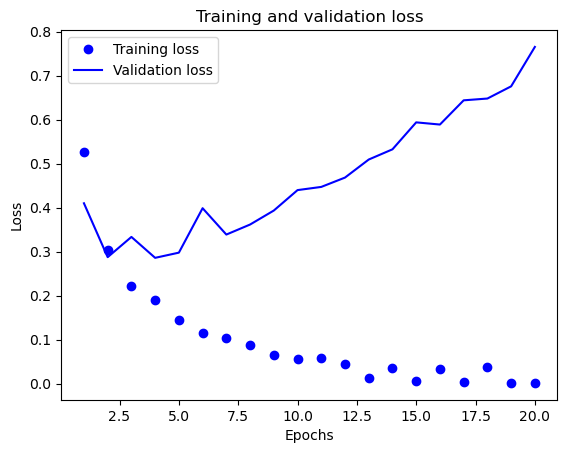

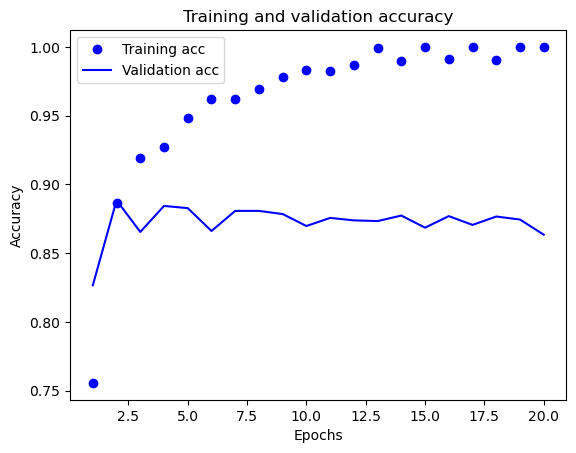

In [62]:
loss_value_32_647 = history_dict_32_647["loss"]
val_loss_value_32_647 = history_dict_32_647["val_loss"]
epochs_32 = range(1, len(loss_value_32_647) + 1)
plot647.plot(epochs_32, loss_value_32_647, "bo", label="Training loss")
plot647.plot(epochs_32, val_loss_value_32_647, "b", label="Validation loss")
plot647.title("Training and validation loss")
plot647.xlabel("Epochs")
plot647.ylabel("Loss")
plot647.legend()
plot647.show()


plot647.clf()
accuracy_32 = history_dict_32_647["accuracy"]
val_accuracy_32 = history_dict_32_647["val_accuracy"]
plot647.plot(epochs_32, accuracy_32, "bo", label="Training acc")
plot647.plot(epochs_32, val_accuracy_32, "b", label="Validation acc")
plot647.title("Training and validation accuracy")
plot647.xlabel("Epochs")
plot647.ylabel("Accuracy")
plot647.legend()
plot647.show()

In [63]:
history_32_units_647 = model_32_units_647.fit(x_train, y_train, epochs=3, batch_size=512)
results_32_units_647 = model_32_units_647.evaluate(x_test, y_test)
results_32_units_647

Epoch 1/3
49/49 [==============================] - 1s 12ms/step - loss: 0.2330 - accuracy: 0.9438
Epoch 2/3
49/49 [==============================] - 1s 12ms/step - loss: 0.1160 - accuracy: 0.9634
Epoch 3/3
782/782 [==============================] - 2s 2ms/step - loss: 0.4369 - accuracy: 0.8660


[0.4369310140609741, 0.8659600019454956]

In [68]:
model_64_units_647 = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_64_units_647.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
# validation
x_val_64_2 = x_train[:10000]
partial_x_train_64_2 = x_train[10000:]

y_val_64_2 = y_train[:10000]
partial_y_train_64_2 = y_train[10000:]

history_64_647 = model_64_units_647.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val_64_2, y_val_64_2))

Epoch 1/20
30/30 [==============================] - 2s 46ms/step - loss: 0.4884 - accuracy: 0.7796 - val_loss: 0.3977 - val_accuracy: 0.8260
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2890 - accuracy: 0.8888 - val_loss: 0.2842 - val_accuracy: 0.8886
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2232 - accuracy: 0.9171 - val_loss: 0.2898 - val_accuracy: 0.8831
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1793 - accuracy: 0.9337 - val_loss: 0.3043 - val_accuracy: 0.8783
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1545 - accuracy: 0.9431 - val_loss: 0.2874 - val_accuracy: 0.8861
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1175 - accuracy: 0.9595 - val_loss: 0.3196 - val_accuracy: 0.8790
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1015 - accuracy: 0.9658 - val_loss: 0.4619 - val_accuracy: 0.8504
Epoch 8/20
30

In [69]:
history_dict_64_647 = history_64_647.history
history_dict_64_647.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [70]:
model_64_units_647 = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_64_units_647.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
# validation
x_val_64_2 = x_train[:10000]
partial_x_train_64_2 = x_train[10000:]

y_val_64_2 = y_train[:10000]
partial_y_train_64_2 = y_train[10000:]

history_64_647 = model_64_units_647.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val_64_2, y_val_64_2))

Epoch 1/20
30/30 [==============================] - 2s 52ms/step - loss: 0.5202 - accuracy: 0.7505 - val_loss: 0.3723 - val_accuracy: 0.8564
Epoch 2/20
30/30 [==============================] - 1s 30ms/step - loss: 0.3063 - accuracy: 0.8854 - val_loss: 0.2951 - val_accuracy: 0.8832
Epoch 3/20
30/30 [==============================] - 1s 30ms/step - loss: 0.2232 - accuracy: 0.9187 - val_loss: 0.3033 - val_accuracy: 0.8766
Epoch 4/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1889 - accuracy: 0.9287 - val_loss: 0.2888 - val_accuracy: 0.8829
Epoch 5/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1536 - accuracy: 0.9425 - val_loss: 0.2837 - val_accuracy: 0.8867
Epoch 6/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1154 - accuracy: 0.9609 - val_loss: 0.3271 - val_accuracy: 0.8762
Epoch 7/20
30/30 [==============================] - 1s 29ms/step - loss: 0.0962 - accuracy: 0.9669 - val_loss: 0.4959 - val_accuracy: 0.8362
Epoch 8/20
30

In [71]:
history_dict_64_647 = history_64_647.history
history_dict_64_647.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

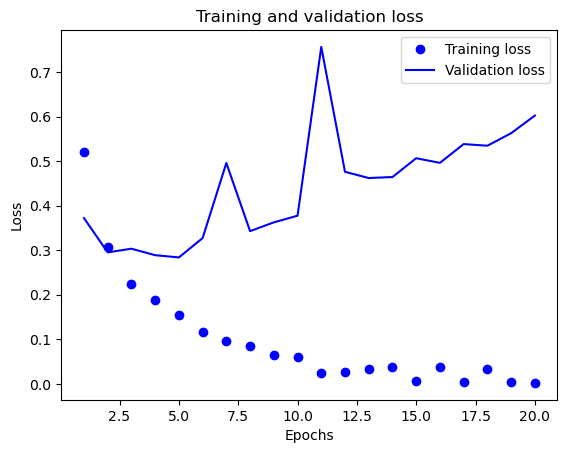

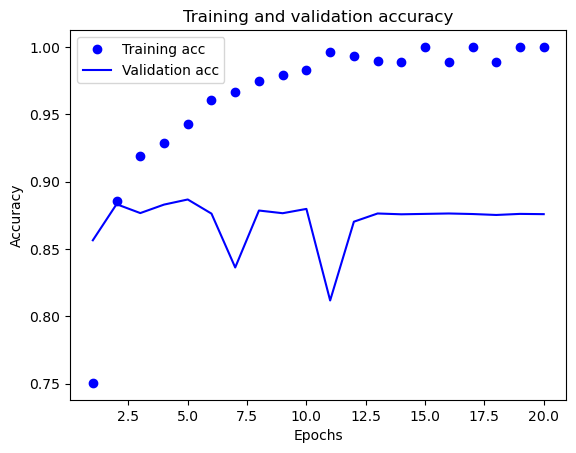

In [73]:
loss_value64 = history_dict_64_647["loss"]
val_loss_value64 = history_dict_64_647["val_loss"]
epochs_64 = range(1, len(loss_value64) + 1)
plot647.plot(epochs_64, loss_value64, "bo", label="Training loss")
plot647.plot(epochs_64, val_loss_value64, "b", label="Validation loss")
plot647.title("Training and validation loss")
plot647.xlabel("Epochs")
plot647.ylabel("Loss")
plot647.legend()
plot647.show()

plot647.clf()
accuracy_64 = history_dict_64_647["accuracy"]
val_accuracy_64 = history_dict_64_647["val_accuracy"]
plot647.plot(epochs_64, accuracy_64, "bo", label="Training acc")
plot647.plot(epochs_64, val_accuracy_64, "b", label="Validation acc")
plot647.title("Training and validation accuracy")
plot647.xlabel("Epochs")
plot647.ylabel("Accuracy")
plot647.legend()
plot647.show()

In [74]:
history_64_647 = model_64_units_647.fit(x_train, y_train, epochs=3, batch_size=512)
results_64_units_647 = model_64_units_647.evaluate(x_test, y_test)
results_64_units_647

Epoch 1/3
49/49 [==============================] - 1s 18ms/step - loss: 0.1847 - accuracy: 0.9467
Epoch 2/3
49/49 [==============================] - 1s 17ms/step - loss: 0.0986 - accuracy: 0.9689
Epoch 3/3
782/782 [==============================] - 2s 3ms/step - loss: 0.4185 - accuracy: 0.8689


[0.41850167512893677, 0.8689200282096863]

In [80]:
model_64_units_647.predict(x_test)

782/782 [==============================] - 1s 2ms/step


array([[0.00849054],
       [0.9999932 ],
       [0.05502073],
       ...,
       [0.01862807],
       [0.00238095],
       [0.88207173]], dtype=float32)

In [81]:
model_128units_647 = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_128units_647.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
# validation
x_val_128_647 = x_train[:10000]
partial_x_train_647 = x_train[10000:]

y_val_128_647 = y_train[:10000]
partial_y_train_647 = y_train[10000:]

history_128_3 = model_128units_647.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val_128_647, y_val_128_647))

Epoch 1/20
30/30 [==============================] - 5s 121ms/step - loss: 0.5458 - accuracy: 0.7292 - val_loss: 0.3432 - val_accuracy: 0.8656
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.3185 - accuracy: 0.8753 - val_loss: 0.2994 - val_accuracy: 0.8759
Epoch 3/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2313 - accuracy: 0.9082 - val_loss: 0.2708 - val_accuracy: 0.8875
Epoch 4/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1748 - accuracy: 0.9330 - val_loss: 0.3115 - val_accuracy: 0.8798
Epoch 5/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1408 - accuracy: 0.9471 - val_loss: 0.3132 - val_accuracy: 0.8844
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.0969 - accuracy: 0.9659 - val_loss: 0.3412 - val_accuracy: 0.8821
Epoch 7/20
30/30 [==============================] - 1s 33ms/step - loss: 0.0912 - accuracy: 0.9706 - val_loss: 0.3584 - val_accuracy: 0.8815
Epoch 8/20
3

In [82]:
history_dict_128_3 = history_128_3.history
history_dict_128_3.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

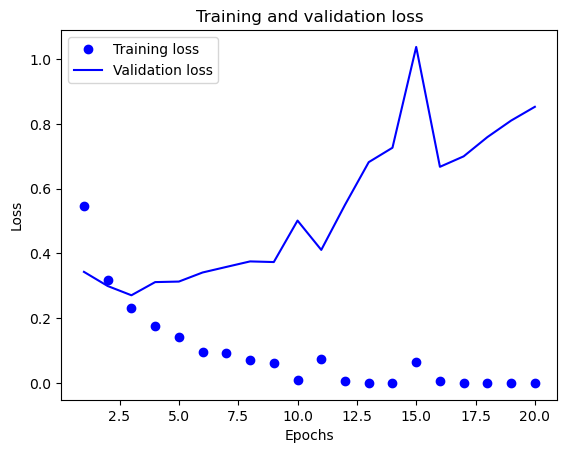

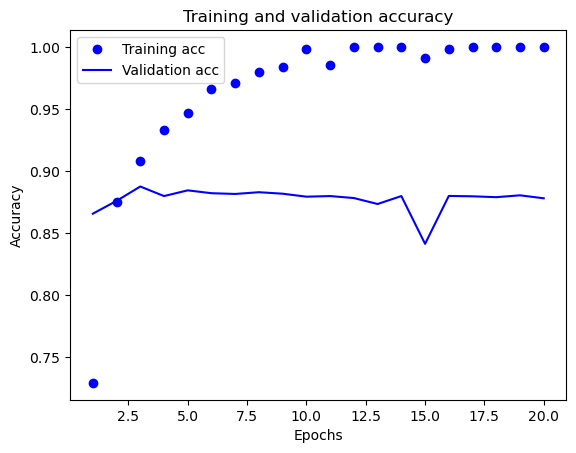

In [83]:
loss_value128_3 = history_dict_128_3["loss"]
val_loss_value128_3 = history_dict_128_3["val_loss"]
epochs_128 = range(1, len(loss_value128_3) + 1)
plot647.plot(epochs_128, loss_value128_3, "bo", label="Training loss")
plot647.plot(epochs_128, val_loss_value128_3, "b", label="Validation loss")
plot647.title("Training and validation loss")
plot647.xlabel("Epochs")
plot647.ylabel("Loss")
plot647.legend()
plot647.show()


plot647.clf()
accuracy_128 = history_dict_128_3["accuracy"]
val_accuracy_128 = history_dict_128_3["val_accuracy"]
plot647.plot(epochs_128, accuracy_128, "bo", label="Training acc")
plot647.plot(epochs_128, val_accuracy_128, "b", label="Validation acc")
plot647.title("Training and validation accuracy")
plot647.xlabel("Epochs")
plot647.ylabel("Accuracy")
plot647.legend()
plot647.show()

In [85]:
history_128_3 = model_128units_647.fit(x_train, y_train, epochs=2, batch_size=512)
results_128_units_3 = model_128units_647.evaluate(x_test, y_test)
results_128_units_3

Epoch 1/2
49/49 [==============================] - 1s 24ms/step - loss: 0.1988 - accuracy: 0.9433
Epoch 2/2
782/782 [==============================] - 2s 3ms/step - loss: 0.4085 - accuracy: 0.8612


[0.40850019454956055, 0.8611599802970886]

In [86]:
model_128units_647.predict(x_test)

782/782 [==============================] - 3s 3ms/step


array([[0.01175336],
       [0.9999973 ],
       [0.29948866],
       ...,
       [0.00321892],
       [0.00363051],
       [0.6763749 ]], dtype=float32)

In [ ]:
MSE Loss Function model with 16 units and 3-layers

In [88]:
MSE_model_16_647 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
# compilation of model
MSE_model_16_647.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
# validation of model
x_val_MSE_16 = x_train[:10000]
partial_x_train_16 = x_train[10000:]

y_val_MSE_16 = y_train[:10000]
partial_y_train_16 = y_train[10000:]
# Model Fit

history_MSE_647 = MSE_model_16_647.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val_MSE_16, y_val_MSE_16))

Epoch 1/20
30/30 [==============================] - 3s 54ms/step - loss: 0.1951 - accuracy: 0.7305 - val_loss: 0.1389 - val_accuracy: 0.8544
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1103 - accuracy: 0.8817 - val_loss: 0.1039 - val_accuracy: 0.8739
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0770 - accuracy: 0.9139 - val_loss: 0.0880 - val_accuracy: 0.8880
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0594 - accuracy: 0.9315 - val_loss: 0.0851 - val_accuracy: 0.8871
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0512 - accuracy: 0.9407 - val_loss: 0.0836 - val_accuracy: 0.8867
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0414 - accuracy: 0.9547 - val_loss: 0.1029 - val_accuracy: 0.8606
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0362 - accuracy: 0.9607 - val_loss: 0.0940 - val_accuracy: 0.8737
Epoch 8/20
30

In [89]:
historydict_MSE_647 = history_MSE_647.history
historydict_MSE_647.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

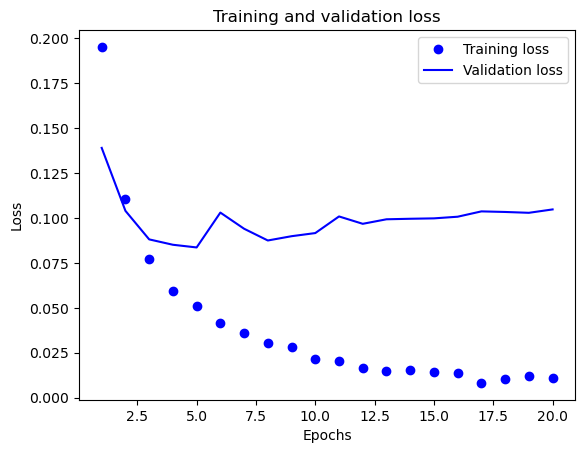

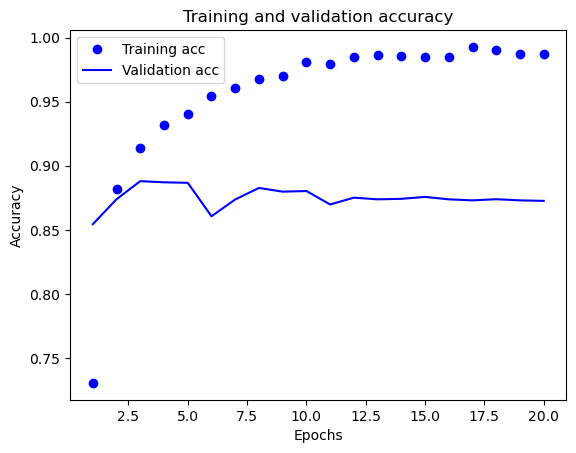

In [93]:
import matplotlib.pyplot as plot647
loss_value_MSE_16_3 = historydict_MSE_647["loss"]
val_loss_value_MSE_16_3 = historydict_MSE_647["val_loss"]
epochs_MSE = range(1, len(loss_value_MSE_16_3) + 1)
plot647.plot(epochs_MSE, loss_value_MSE_16_3, "bo", label="Training loss")
plot647.plot(epochs_MSE, val_loss_value_MSE_16_3, "b", label="Validation loss")
plot647.title("Training and validation loss")
plot647.xlabel("Epochs")
plot647.ylabel("Loss")
plot647.legend()
plot647.show()


plot647.clf()
acc_MSE = historydict_MSE_647["accuracy"]
val_acc_MSE = historydict_MSE_647["val_accuracy"]
plot647.plot(epochs_MSE, acc_MSE, "bo", label="Training acc")
plot647.plot(epochs_MSE, val_acc_MSE, "b", label="Validation acc")
plot647.title("Training and validation accuracy")
plot647.xlabel("Epochs")
plot647.ylabel("Accuracy")
plot647.legend()
plot647.show()

In [95]:
MSE_model_16_647.fit(x_train, y_train, epochs=8, batch_size=512)
results_MSE_647 = MSE_model_16_647.evaluate(x_test, y_test)
results_MSE_647

Epoch 1/8
49/49 [==============================] - 1s 10ms/step - loss: 0.0470 - accuracy: 0.9436
Epoch 2/8
49/49 [==============================] - 0s 10ms/step - loss: 0.0373 - accuracy: 0.9576
Epoch 3/8
49/49 [==============================] - 0s 10ms/step - loss: 0.0320 - accuracy: 0.9638
Epoch 4/8
49/49 [==============================] - 0s 10ms/step - loss: 0.0281 - accuracy: 0.9691
Epoch 5/8
49/49 [==============================] - 0s 10ms/step - loss: 0.0262 - accuracy: 0.9714
Epoch 6/8
49/49 [==============================] - 0s 10ms/step - loss: 0.0227 - accuracy: 0.9764
Epoch 7/8
49/49 [==============================] - 0s 10ms/step - loss: 0.0202 - accuracy: 0.9791
Epoch 8/8
782/782 [==============================] - 2s 2ms/step - loss: 0.1146 - accuracy: 0.8655


[0.11460591107606888, 0.8655200004577637]

In [96]:
MSE_model_16_647.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.00590061],
       [0.9997233 ],
       [0.9690721 ],
       ...,
       [0.18612532],
       [0.00220081],
       [0.8965425 ]], dtype=float32)

In [98]:
tanh_647 = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

tanh_647.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

x_val_tanh = x_train[:10000]
partial_x_train = x_train[10000:]

y_val_tanh = y_train[:10000]
partial_y_train = y_train[10000:]


historytanh_model = tanh_647.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val_tanh, y_val_tanh))

Epoch 1/20
30/30 [==============================] - 2s 41ms/step - loss: 0.1671 - accuracy: 0.7932 - val_loss: 0.1277 - val_accuracy: 0.8619
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1043 - accuracy: 0.8924 - val_loss: 0.1028 - val_accuracy: 0.8800
Epoch 3/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0828 - accuracy: 0.9095 - val_loss: 0.1056 - val_accuracy: 0.8620
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0697 - accuracy: 0.9234 - val_loss: 0.0878 - val_accuracy: 0.8894
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0617 - accuracy: 0.9339 - val_loss: 0.0850 - val_accuracy: 0.8898
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0543 - accuracy: 0.9430 - val_loss: 0.0840 - val_accuracy: 0.8899
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0492 - accuracy: 0.9491 - val_loss: 0.0842 - val_accuracy: 0.8868
Epoch 8/20
30

In [99]:
historydict_tanh_647 = historytanh_model.history
historydict_tanh_647.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

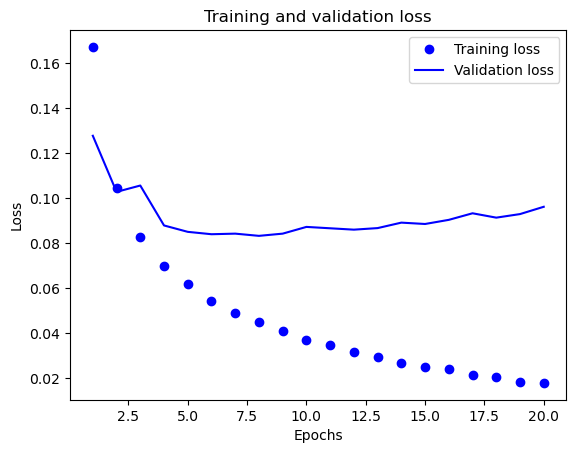

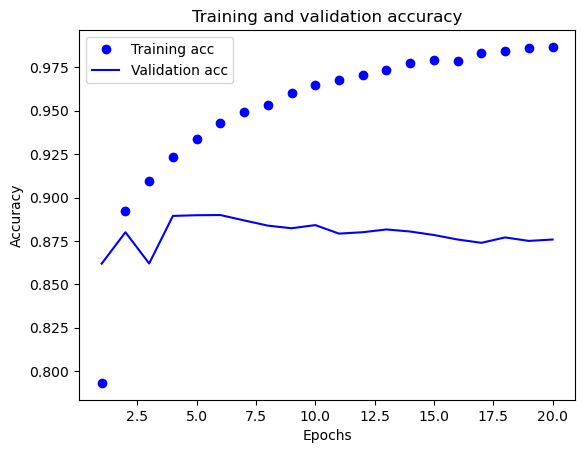

In [100]:
loss_value_tanh_647= historydict_tanh_647["loss"]
val_loss_value_tanh_647 = historydict_tanh_647["val_loss"]
epochs_tanh = range(1, len(loss_value_tanh_647) + 1)
plot647.plot(epochs_tanh, loss_value_tanh_647, "bo", label="Training loss")
plot647.plot(epochs_tanh, val_loss_value_tanh_647, "b", label="Validation loss")
plot647.title("Training and validation loss")
plot647.xlabel("Epochs")
plot647.ylabel("Loss")
plot647.legend()
plot647.show()

plot647.clf()
acc_tanh = historydict_tanh_647["accuracy"]
val_acc_tanh = historydict_tanh_647["val_accuracy"]
plot647.plot(epochs_tanh, acc_tanh, "bo", label="Training acc")
plot647.plot(epochs_tanh, val_acc_tanh, "b", label="Validation acc")
plot647.title("Training and validation accuracy")
plot647.xlabel("Epochs")
plot647.ylabel("Accuracy")
plot647.legend()
plot647.show()

In [101]:
tanh_647.fit(x_train, y_train, epochs=8, batch_size=512)
results_tanh_647 = tanh_647.evaluate(x_test, y_test)
results_tanh_647

Epoch 1/8
49/49 [==============================] - 1s 10ms/step - loss: 0.0472 - accuracy: 0.9437
Epoch 2/8
49/49 [==============================] - 0s 9ms/step - loss: 0.0405 - accuracy: 0.9526
Epoch 3/8
49/49 [==============================] - 0s 9ms/step - loss: 0.0362 - accuracy: 0.9606
Epoch 4/8
49/49 [==============================] - 0s 10ms/step - loss: 0.0339 - accuracy: 0.9635
Epoch 5/8
49/49 [==============================] - 0s 10ms/step - loss: 0.0314 - accuracy: 0.9668
Epoch 6/8
49/49 [==============================] - 0s 9ms/step - loss: 0.0289 - accuracy: 0.9705
Epoch 7/8
49/49 [==============================] - 0s 9ms/step - loss: 0.0269 - accuracy: 0.9739
Epoch 8/8
782/782 [==============================] - 1s 2ms/step - loss: 0.1074 - accuracy: 0.8658


[0.10740776360034943, 0.8658400177955627]

In [ ]:
Adam Operator with 16 units and 3-layers

In [104]:
adam_647 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
     layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

adam_647.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

x_adam_647 = x_train[:10000]
partial_x_train_16 = x_train[10000:]

y_adam_647 = y_train[:10000]
partial_y_train_16 = y_train[10000:]
 

historyadam_647 = adam_647.fit(partial_x_train_16,
                    partial_y_train_16,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_adam_647, y_adam_647))

Epoch 1/20
30/30 [==============================] - 3s 33ms/step - loss: 0.6047 - accuracy: 0.7668 - val_loss: 0.4684 - val_accuracy: 0.8557
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3506 - accuracy: 0.8892 - val_loss: 0.3125 - val_accuracy: 0.8822
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2188 - accuracy: 0.9273 - val_loss: 0.2759 - val_accuracy: 0.8924
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1546 - accuracy: 0.9496 - val_loss: 0.2831 - val_accuracy: 0.8861
Epoch 5/20
30/30 [==============================] - 1s 16ms/step - loss: 0.1108 - accuracy: 0.9668 - val_loss: 0.3039 - val_accuracy: 0.8843
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0806 - accuracy: 0.9789 - val_loss: 0.3335 - val_accuracy: 0.8828
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0561 - accuracy: 0.9881 - val_loss: 0.3698 - val_accuracy: 0.8799
Epoch 8/20
30

In [105]:
historydict_adam_647 = historyadam_647.history
historydict_adam_647.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

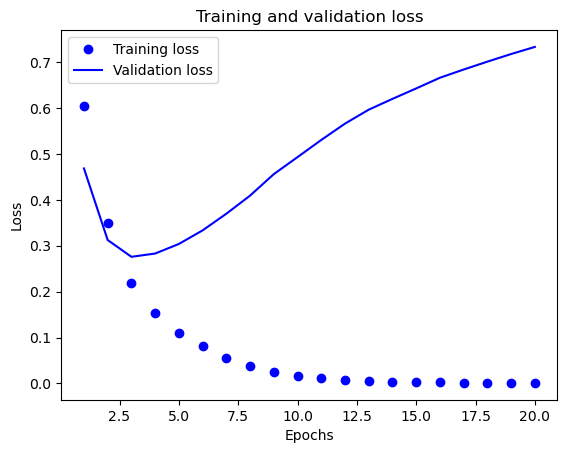

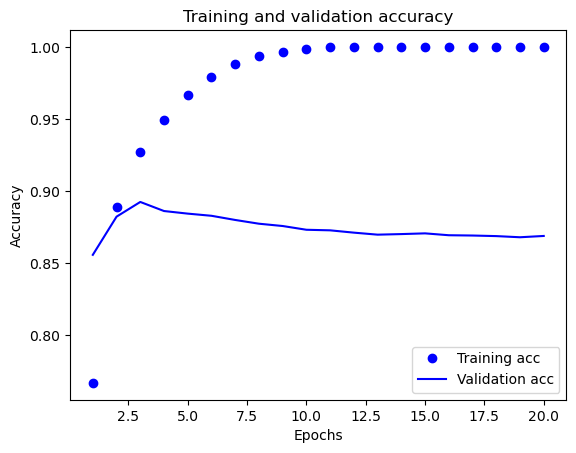

In [106]:
loss_value_adam_647 = historydict_adam_647["loss"]
val_loss_value_adam_647 = historydict_adam_647["val_loss"]
epochs_adam = range(1, len(loss_value_adam_647) + 1)
plot647.plot(epochs_adam, loss_value_adam_647, "bo", label="Training loss")
plot647.plot(epochs_adam, val_loss_value_adam_647, "b", label="Validation loss")
plot647.title("Training and validation loss")
plot647.xlabel("Epochs")
plot647.ylabel("Loss")
plot647.legend()
plot647.show()


plot647.clf()
acc_adam = historydict_adam_647["accuracy"]
val_acc_adam = historydict_adam_647["val_accuracy"]
plot647.plot(epochs_adam, acc_adam, "bo", label="Training acc")
plot647.plot(epochs_adam, val_acc_adam, "b", label="Validation acc")
plot647.title("Training and validation accuracy")
plot647.xlabel("Epochs")
plot647.ylabel("Accuracy")
plot647.legend()
plot647.show()

In [108]:
adam_647.fit(x_train, y_train, epochs=4, batch_size=512)
results_adam = adam_647.evaluate(x_test, y_test)
results_adam

Epoch 1/4
49/49 [==============================] - 1s 10ms/step - loss: 0.2338 - accuracy: 0.9386
Epoch 2/4
49/49 [==============================] - 0s 10ms/step - loss: 0.1076 - accuracy: 0.9670
Epoch 3/4
49/49 [==============================] - 0s 10ms/step - loss: 0.0643 - accuracy: 0.9836
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.5441 - accuracy: 0.8588


[0.5440570712089539, 0.8587599992752075]

In [ ]:
Regularization model with 16 units and 2-layers

In [109]:
from tensorflow.keras import regularizers
regularization647 = keras.Sequential([
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1, activation="sigmoid")
])
regularization647.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_regularization647 = regularization647.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
historydict_regularization647 = history_regularization647.history
historydict_regularization647.keys()

Epoch 1/20
30/30 [==============================] - 2s 37ms/step - loss: 0.5952 - accuracy: 0.7687 - val_loss: 0.4743 - val_accuracy: 0.8488
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.4008 - accuracy: 0.8843 - val_loss: 0.3773 - val_accuracy: 0.8787
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3173 - accuracy: 0.9093 - val_loss: 0.3422 - val_accuracy: 0.8881
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2741 - accuracy: 0.9235 - val_loss: 0.3498 - val_accuracy: 0.8782
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2469 - accuracy: 0.9348 - val_loss: 0.3387 - val_accuracy: 0.8845
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2301 - accuracy: 0.9405 - val_loss: 0.3687 - val_accuracy: 0.8740
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2143 - accuracy: 0.9479 - val_loss: 0.3425 - val_accuracy: 0.8842
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

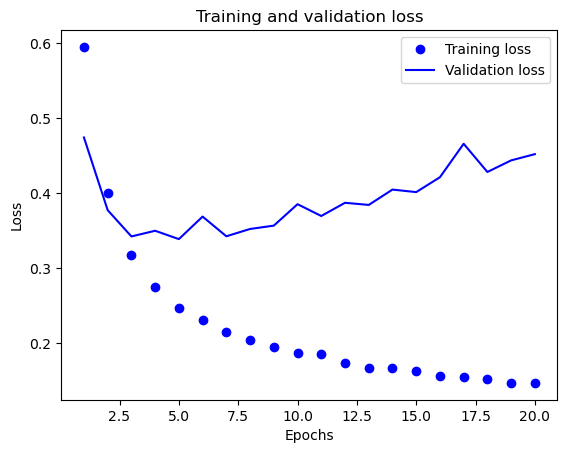

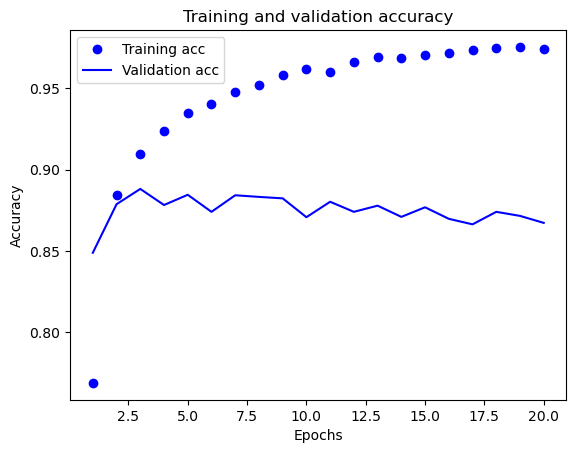

In [114]:
loss_valu_647 = historydict_regularization647["loss"]
val_loss_value_r_647 = historydict_regularization647["val_loss"]
epochs_r = range(1, len(loss_valu_647) + 1)
plot647.plot(epochs_r, loss_valu_647, "bo", label="Training loss")
plot647.plot(epochs_r, val_loss_value_r_647, "b", label="Validation loss")
plot647.title("Training and validation loss")
plot647.xlabel("Epochs")
plot647.ylabel("Loss")
plot647.legend()
plot647.show()

plot647.clf()
acc_r = historydict_regularization647["accuracy"]
val_acc_r = historydict_regularization647["val_accuracy"]
plot647.plot(epochs_r, acc_r, "bo", label="Training acc")
plot647.plot(epochs_r, val_acc_r, "b", label="Validation acc")
plot647.title("Training and validation accuracy")
plot647.xlabel("Epochs")
plot647.ylabel("Accuracy")
plot647.legend()
plot647.show()

In [117]:
regularization647.fit(x_train, y_train, epochs=8, batch_size=512)
results_regularization_647 = regularization647.evaluate(x_test, y_test)
results_regularization_647

Epoch 1/8
49/49 [==============================] - 1s 10ms/step - loss: 0.1793 - accuracy: 0.9577
Epoch 2/8
49/49 [==============================] - 0s 10ms/step - loss: 0.1780 - accuracy: 0.9583
Epoch 3/8
49/49 [==============================] - 0s 10ms/step - loss: 0.1738 - accuracy: 0.9590
Epoch 4/8
49/49 [==============================] - 0s 10ms/step - loss: 0.1701 - accuracy: 0.9610
Epoch 5/8
49/49 [==============================] - 0s 10ms/step - loss: 0.1667 - accuracy: 0.9630
Epoch 6/8
49/49 [==============================] - 0s 10ms/step - loss: 0.1679 - accuracy: 0.9625
Epoch 7/8
49/49 [==============================] - 0s 10ms/step - loss: 0.1605 - accuracy: 0.9650
Epoch 8/8
782/782 [==============================] - 2s 2ms/step - loss: 0.4396 - accuracy: 0.8661


[0.4395553171634674, 0.8660799860954285]

In [ ]:
Dropout function with 16 units and 3-layers

In [120]:
from tensorflow.keras import regularizers
Dropout647 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
Dropout647.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_Dropout_647 = Dropout647.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
historydict_Dropout_647 = history_Dropout_647.history
historydict_Dropout_647.keys()

Epoch 1/20
30/30 [==============================] - 2s 48ms/step - loss: 0.6677 - accuracy: 0.5911 - val_loss: 0.6050 - val_accuracy: 0.7897
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.5911 - accuracy: 0.7177 - val_loss: 0.5078 - val_accuracy: 0.8567
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.5176 - accuracy: 0.7960 - val_loss: 0.4310 - val_accuracy: 0.8718
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.4675 - accuracy: 0.8289 - val_loss: 0.4000 - val_accuracy: 0.8788
Epoch 5/20
30/30 [==============================] - 0s 17ms/step - loss: 0.4181 - accuracy: 0.8577 - val_loss: 0.3577 - val_accuracy: 0.8797
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3770 - accuracy: 0.8793 - val_loss: 0.3453 - val_accuracy: 0.8813
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3362 - accuracy: 0.8949 - val_loss: 0.3204 - val_accuracy: 0.8821
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

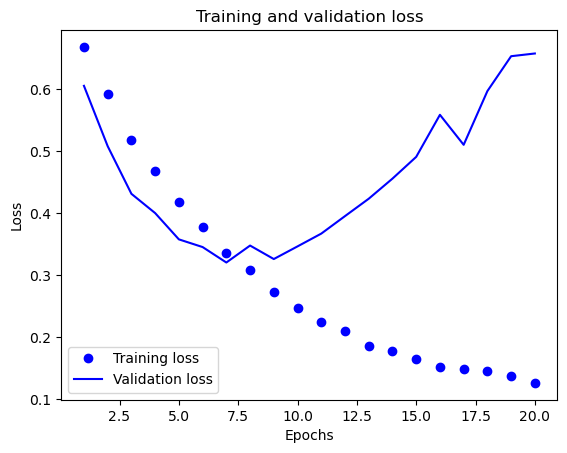

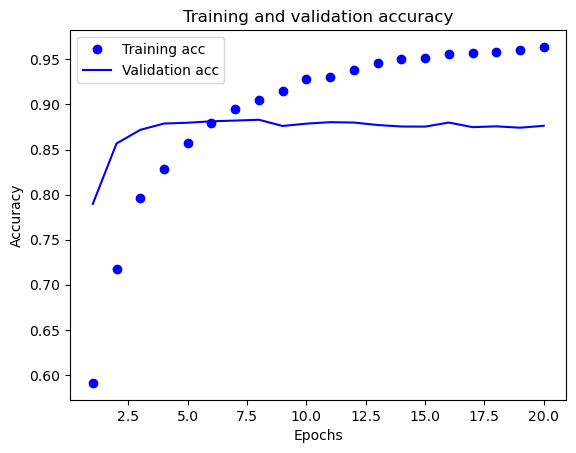

In [121]:
loss_val_647 = historydict_Dropout_647["loss"]
val_loss_val_d_647 = historydict_Dropout_647["val_loss"]
epochs_d = range(1, len(loss_val_647) + 1)
plot647.plot(epochs_d, loss_val_647, "bo", label="Training loss")
plot647.plot(epochs_d, val_loss_val_d_647, "b", label="Validation loss")
plot647.title("Training and validation loss")
plot647.xlabel("Epochs")
plot647.ylabel("Loss")
plot647.legend()
plot647.show()


plot647.clf()
acc_d = historydict_Dropout_647["accuracy"]
val_acc_d = historydict_Dropout_647["val_accuracy"]
plot647.plot(epochs_d, acc_d, "bo", label="Training acc")
plot647.plot(epochs_d, val_acc_d, "b", label="Validation acc")
plot647.title("Training and validation accuracy")
plot647.xlabel("Epochs")
plot647.ylabel("Accuracy")
plot647.legend()
plot647.show()

In [122]:
Dropout647.fit(x_train, y_train, epochs=8, batch_size=512)
results_Dropout647 = Dropout647.evaluate(x_test, y_test)
results_Dropout647

Epoch 1/8
49/49 [==============================] - 1s 11ms/step - loss: 0.3281 - accuracy: 0.9078
Epoch 2/8
49/49 [==============================] - 1s 11ms/step - loss: 0.2747 - accuracy: 0.9168
Epoch 3/8
49/49 [==============================] - 1s 11ms/step - loss: 0.2403 - accuracy: 0.9241
Epoch 4/8
49/49 [==============================] - 1s 11ms/step - loss: 0.2326 - accuracy: 0.9250
Epoch 5/8
49/49 [==============================] - 1s 11ms/step - loss: 0.2142 - accuracy: 0.9304
Epoch 6/8
49/49 [==============================] - 1s 12ms/step - loss: 0.2014 - accuracy: 0.9345
Epoch 7/8
49/49 [==============================] - 1s 11ms/step - loss: 0.2011 - accuracy: 0.9366
Epoch 8/8
782/782 [==============================] - 1s 2ms/step - loss: 0.4830 - accuracy: 0.8679


[0.4830073118209839, 0.8679199814796448]

In [ ]:
Training model with hyper tuned parameters with 32 units and 3 -layers

In [124]:
from tensorflow.keras import regularizers
Hyper647 = keras.Sequential([
    layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),    
    layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
Hyper647.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

history_Hyper647 = Hyper647.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dictHyper647 = history_Hyper647.history
history_dictHyper647.keys()

Epoch 1/20
30/30 [==============================] - 2s 41ms/step - loss: 0.2497 - accuracy: 0.5767 - val_loss: 0.2034 - val_accuracy: 0.8205
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1952 - accuracy: 0.7405 - val_loss: 0.1386 - val_accuracy: 0.8518
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1495 - accuracy: 0.8250 - val_loss: 0.1105 - val_accuracy: 0.8703
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1218 - accuracy: 0.8649 - val_loss: 0.1001 - val_accuracy: 0.8824
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1038 - accuracy: 0.8911 - val_loss: 0.0991 - val_accuracy: 0.8862
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0865 - accuracy: 0.9136 - val_loss: 0.1068 - val_accuracy: 0.8777
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0783 - accuracy: 0.9223 - val_loss: 0.1030 - val_accuracy: 0.8856
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

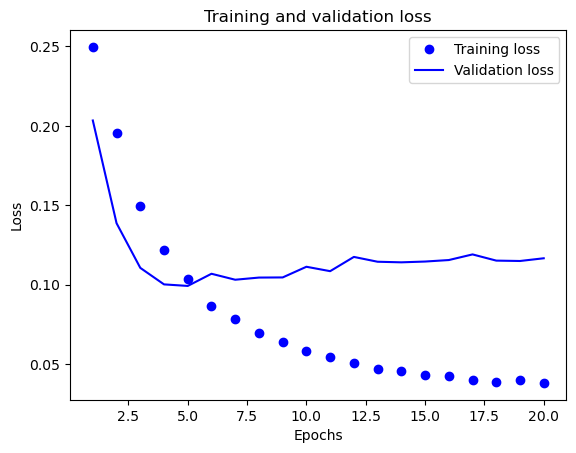

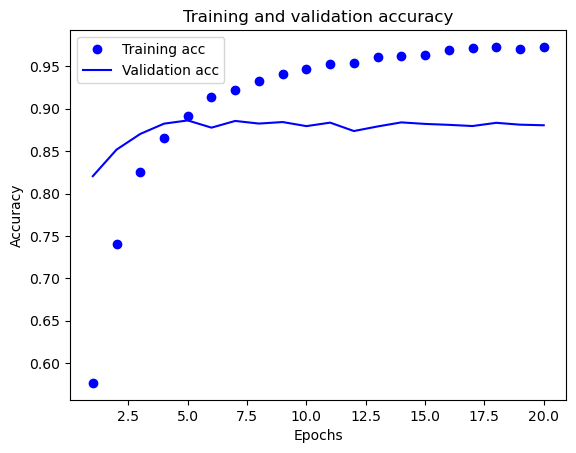

In [125]:
loss_va_h_647 = history_dictHyper647["loss"]
val_loss_va_h_647 = history_dictHyper647["val_loss"]
epochs_h = range(1, len(loss_va_h_647) + 1)
plot647.plot(epochs_h, loss_va_h_647, "bo", label="Training loss")
plot647.plot(epochs_h, val_loss_va_h_647, "b", label="Validation loss")
plot647.title("Training and validation loss")
plot647.xlabel("Epochs")
plot647.ylabel("Loss")
plot647.legend()
plot647.show()


plot647.clf()
acc_h = history_dictHyper647["accuracy"]
val_acc_h = history_dictHyper647["val_accuracy"]
plot647.plot(epochs_h, acc_h, "bo", label="Training acc")
plot647.plot(epochs_h, val_acc_h, "b", label="Validation acc")
plot647.title("Training and validation accuracy")
plot647.xlabel("Epochs")
plot647.ylabel("Accuracy")
plot647.legend()
plot647.show()

In [126]:
Hyper647.fit(x_train, y_train, epochs=8, batch_size=512)
results_Hyper647 = Hyper647.evaluate(x_test, y_test)
results_Hyper647

Epoch 1/8
49/49 [==============================] - 1s 16ms/step - loss: 0.0721 - accuracy: 0.9306
Epoch 2/8
49/49 [==============================] - 1s 13ms/step - loss: 0.0663 - accuracy: 0.9378
Epoch 3/8
49/49 [==============================] - 1s 13ms/step - loss: 0.0597 - accuracy: 0.9457
Epoch 4/8
49/49 [==============================] - 1s 13ms/step - loss: 0.0562 - accuracy: 0.9496
Epoch 5/8
49/49 [==============================] - 1s 13ms/step - loss: 0.0529 - accuracy: 0.9540
Epoch 6/8
49/49 [==============================] - 1s 13ms/step - loss: 0.0508 - accuracy: 0.9561
Epoch 7/8
49/49 [==============================] - 1s 13ms/step - loss: 0.0501 - accuracy: 0.9564
Epoch 8/8
782/782 [==============================] - 5s 6ms/step - loss: 0.1135 - accuracy: 0.8814


[0.11353429406881332, 0.8813999891281128]

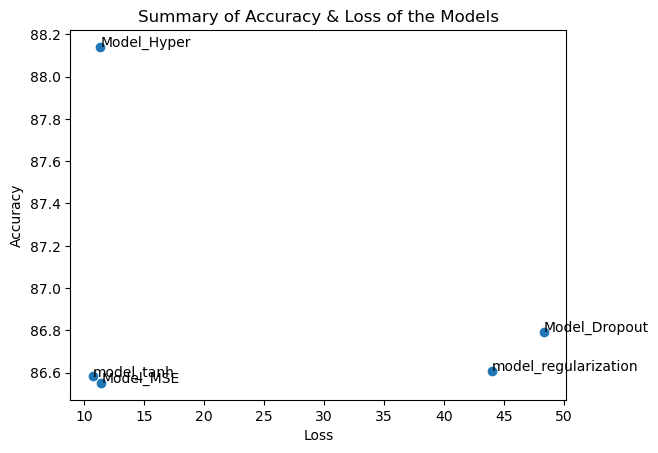

In [139]:
fig, axis = plot647.subplots()
axis.scatter(Models_Loss,Models_Accuracy)
for i, txt in enumerate(Labels):
    axis.annotate(txt, (Models_Loss[i],Models_Accuracy[i] ))
plot647.title("Summary of Accuracy & Loss of the Models")
plot647.ylabel("Accuracy")
plot647.xlabel("Loss")

plot647.show()

In [ ]:
First, data had to be imported, review analysis settings had to be specified, and a simple neural network with one 16-unit hidden layer was constructed using binary crossentropy and relu activation. In order to improve model performance, more research was conducted. This included changing the number of units per layer (32, 64, 128) and the number of hidden layers (one to three). While accuracy was generally increased by increasing the number of concealed units, overfitting was a possibility. Furthermore, there was no discernible difference in the performance of the model when mean squared error (MSE) loss was substituted for binary crossentropy. Overall, the results indicated that while tweaking the architecture and parameters might improve accuracy, selecting the right loss functions and avoiding overfitting required considerable thought.